In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

     |████████████████████████████████| 14.5 MB 4.3 MB/s eta 0:00:01     |██████████████████████          | 10.0 MB 4.3 MB/s eta 0:00:02
     |████████████████████████████████| 11.6 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 24.5 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 25.9 MB 76 kB/s  eta 0:00:01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from scipy import optimize
from scipy import stats

In [3]:
CsL0=np.genfromtxt('Caesium A 0.TKA',dtype=float)
CsL10=np.genfromtxt('Caesium A 10.TKA',dtype=float)
CsL20=np.genfromtxt('Caesium A 20.TKA',dtype=float)
CsL30=np.genfromtxt('Caesium A 30.TKA',dtype=float)
CsL40=np.genfromtxt('Caesium A 40.TKA',dtype=float)
CsL50=np.genfromtxt('Caesium A 50.TKA',dtype=float)
Cs0=np.genfromtxt('Caesium L 0.TKA',dtype=float)
Cs10=np.genfromtxt('Caesium L 10.TKA',dtype=float)
Cs20=np.genfromtxt('Caesium L 20.TKA',dtype=float)
Cs30=np.genfromtxt('Caesium L 30.TKA',dtype=float)
Cs40=np.genfromtxt('Caesium L 40.TKA',dtype=float)
Cs50=np.genfromtxt('Caesium L 50.TKA',dtype=float)

CoL0=np.genfromtxt('Cobalt A 0.TKA',dtype=float)
CoL10=np.genfromtxt('Cobalt A 10.TKA',dtype=float)
CoL20=np.genfromtxt('Cobalt A 20.TKA',dtype=float)
CoL30=np.genfromtxt('Cobalt A 30.TKA',dtype=float)
CoL40=np.genfromtxt('Cobalt A 40.TKA',dtype=float)
CoL50=np.genfromtxt('Cobalt A 50.TKA',dtype=float)
Co0=np.genfromtxt('Cobalt L 0.TKA',dtype=float)
Co10=np.genfromtxt('Cobalt L 10.TKA',dtype=float)
Co20=np.genfromtxt('Cobalt L 20.TKA',dtype=float)
Co30=np.genfromtxt('Cobalt L 30.TKA',dtype=float)
Co40=np.genfromtxt('Cobalt L 40.TKA',dtype=float)
Co50=np.genfromtxt('Cobalt L 50.TKA',dtype=float)

# Experiment 352: Gamma ray interaction with matter

## Aim

The purpose of this experiment is to confirm the exponential attenuation law for gamma radiation in solid matter, and to measure the attenuation coefficients of 0.662 and 1.333 MeV gamma rays in aluminium and lead.

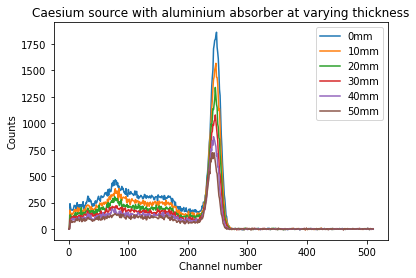

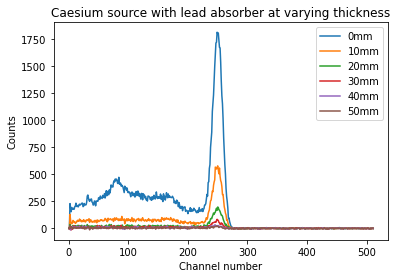

In [4]:
%matplotlib inline

Background1=np.genfromtxt('Background 1.TKA',dtype=float)
Background2=np.genfromtxt('Background 2.TKA',dtype=float)
Chan=np.arange(0,len(Background1),1)
bg=([])
for i in Chan:
    bg=np.append(bg,0.5*(Background1[i]+Background2[i]))
    
    
plt.plot(Chan,(Cs0-bg)) # Imported from 352_DatasetV1, labels swapped for aluminium and lead.
plt.plot(Chan,(Cs10-bg))
plt.plot(Chan,(Cs20-bg))
plt.plot(Chan,(Cs30-bg))
plt.plot(Chan,(Cs40-bg))
plt.plot(Chan,(Cs50-bg))
plt.legend(['0mm','10mm','20mm','30mm','40mm','50mm'])
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Caesium source with aluminium absorber at varying thickness')
plt.show()


plt.plot(Chan,(CsL0-bg))
plt.plot(Chan,(CsL10-bg))
plt.plot(Chan,(CsL20-bg))
plt.plot(Chan,(CsL30-bg))
plt.plot(Chan,(CsL40-bg))
plt.plot(Chan,(CsL50-bg))
plt.legend(['0mm','10mm','20mm','30mm','40mm','50mm'])
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Caesium source with lead absorber at varying thickness')
plt.show()

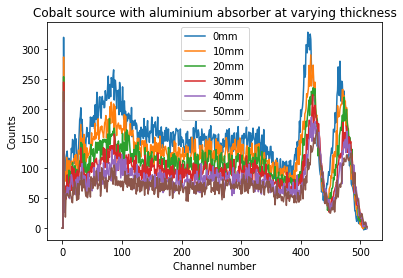

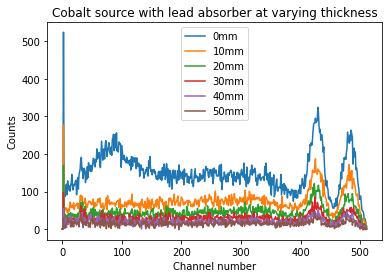

In [5]:
%matplotlib inline

plt.plot(Chan,(Co0-bg))
plt.plot(Chan,(Co10-bg))
plt.plot(Chan,(Co20-bg))
plt.plot(Chan,(Co30-bg))
plt.plot(Chan,(Co40-bg))
plt.plot(Chan,(Co50-bg))
plt.legend(['0mm','10mm','20mm','30mm','40mm','50mm'])
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Cobalt source with aluminium absorber at varying thickness')
plt.show()


plt.plot(Chan,(CoL0-bg))
plt.plot(Chan,(CoL10-bg))
plt.plot(Chan,(CoL20-bg))
plt.plot(Chan,(CoL30-bg))
plt.plot(Chan,(CoL40-bg))
plt.plot(Chan,(CoL50-bg))
plt.legend(['0mm','10mm','20mm','30mm','40mm','50mm'])
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Cobalt source with lead absorber at varying thickness')
plt.show()

The Cobalt-60 sample emits Gamma rays at both 1.17 and 1.33 MeV - these are noticeable as the two distinct peaks at channels ~430 and ~480 respectively. Since the aim of the experiment states that we are interested in attenuation of 1.33 MeV gamma rays, further analysis will ignore this first peak and focus only on the attenuation measured by the second peak at 1.33 MeV. Since I was not able to conduct this experiment in person and am relying on uploaded datasets, I do not know the conditions under which the two separate background measurements were taken and therefore chose to simply take the mean of the two, and subtract this mean from the Co and Cs spectra. I believe that, while not perfect, this will give a more accurate picture of the actual spectrum than randomly choosing one of the two individual measurements. In order to calculate attenuation coefficients, I will numerically integrate the area under the peak in each case, and take this as my value of intensity. I can then fit an exponential curve to the graph of intensity vs absorber thickness in each case.

I will do this by scanning the ~40 channel range either side of the peak to determine integral bounds, taking a best estimate from visual comparison of channel energies, and using these bounds for each calculation from the same source, given that the type of absorber will not alter the energy spectrum of the radiation, just the intensity.

In [6]:
PeakChanCs=np.where((Cs0-bg)==np.max(Cs0-bg)) # Finding the channel of the energy peak
print(Cs0[PeakChanCs[0][0]-40:PeakChanCs[0][0]+40]) 
UpperCs=(PeakChanCs[0][0]+22) 
LowerCs=(PeakChanCs[0][0]-22) 


IntensityCs0=sp.integrate.trapz(Cs0[LowerCs:UpperCs],x=None)
IntensityCs10=sp.integrate.trapz(Cs10[LowerCs:UpperCs],x=None)
IntensityCs20=sp.integrate.trapz(Cs20[LowerCs:UpperCs],x=None)
IntensityCs30=sp.integrate.trapz(Cs30[LowerCs:UpperCs],x=None)
IntensityCs40=sp.integrate.trapz(Cs40[LowerCs:UpperCs],x=None)
IntensityCs50=sp.integrate.trapz(Cs50[LowerCs:UpperCs],x=None)
IntensityCsL0=sp.integrate.trapz(CsL0[LowerCs:UpperCs],x=None)
IntensityCsL10=sp.integrate.trapz(CsL10[LowerCs:UpperCs],x=None)
IntensityCsL20=sp.integrate.trapz(CsL20[LowerCs:UpperCs],x=None)
IntensityCsL30=sp.integrate.trapz(CsL30[LowerCs:UpperCs],x=None)
IntensityCsL40=sp.integrate.trapz(CsL40[LowerCs:UpperCs],x=None)
IntensityCsL50=sp.integrate.trapz(CsL50[LowerCs:UpperCs],x=None)

print(Co0[430:]) # Just eyeballing channel number since global maximum actually lies in 1st channel so not useful.
LowerCo=445 # Eyeballed from data set, since this was easier than setting up any numerical analysis of the peak.
UpperCo=487

IntensityCo0=sp.integrate.trapz(Co0[LowerCo:UpperCo],x=None)
IntensityCo10=sp.integrate.trapz(Co10[LowerCo:UpperCo],x=None)
IntensityCo20=sp.integrate.trapz(Co20[LowerCo:UpperCo],x=None)
IntensityCo30=sp.integrate.trapz(Co30[LowerCo:UpperCo],x=None)
IntensityCo40=sp.integrate.trapz(Co40[LowerCo:UpperCo],x=None)
IntensityCo50=sp.integrate.trapz(Co50[LowerCo:UpperCo],x=None)
IntensityCoL0=sp.integrate.trapz(CoL0[LowerCo:UpperCo],x=None)
IntensityCoL10=sp.integrate.trapz(CoL10[LowerCo:UpperCo],x=None)
IntensityCoL20=sp.integrate.trapz(CoL20[LowerCo:UpperCo],x=None)
IntensityCoL30=sp.integrate.trapz(CoL30[LowerCo:UpperCo],x=None)
IntensityCoL40=sp.integrate.trapz(CoL40[LowerCo:UpperCo],x=None)
IntensityCoL50=sp.integrate.trapz(CoL50[LowerCo:UpperCo],x=None)

[ 188.  183.  167.  192.  173.  193.  167.  176.  169.  173.  170.  171.
  181.  180.  185.  193.  228.  210.  263.  254.  255.  326.  340.  403.
  499.  545.  629.  723.  833.  888. 1045. 1234. 1358. 1443. 1514. 1713.
 1746. 1795. 1798. 1833. 1866. 1727. 1675. 1619. 1498. 1329. 1272. 1095.
  900.  783.  638.  537.  430.  330.  292.  212.  135.  127.   71.   50.
   39.   34.   18.   14.   13.   16.   10.    8.    7.    4.   13.    5.
    5.    6.   11.    4.    6.    3.    7.    5.]
[139. 115. 102.  92.  92.  63.  71.  88.  50.  75.  45.  54.  47.  66.
  77.  78.  87.  97.  91. 101. 120. 126. 136. 128. 140. 167. 168. 163.
 197. 179. 190. 229. 233. 272. 227. 223. 281. 234. 216. 247. 244. 210.
 219. 232. 182. 207. 186. 167. 168. 165. 152. 119. 108. 114.  99.  75.
  73.  73.  67.  62.  50.  33.  31.  20.  16.  24.  21.  12.  11.  17.
  11.  11.   5.   8.  12.   8.   1.  11.   3.   4.   2.   3.]


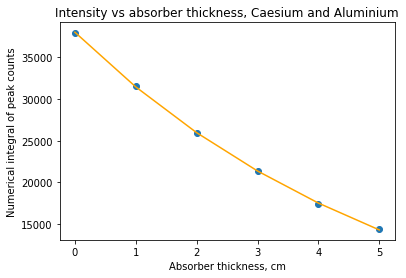

I0: 40188.5282449658
mu: 0.17781904947886218
mu std error (from covariance matrix): 0.006436119547303167
Normalised Chi-square (Chi Square / (datapoints - fitted parameters)): 0.4123700683264639


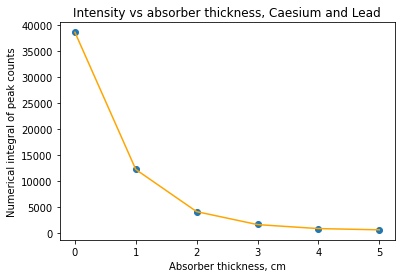

I0: 38082.9457517964
mu: 1.179879600730188
mu std error (from covariance matrix): 0.0032773075364044223
Normalised Chi-square (Chi Square / (datapoints - fitted parameters)): 0.6248936759690625


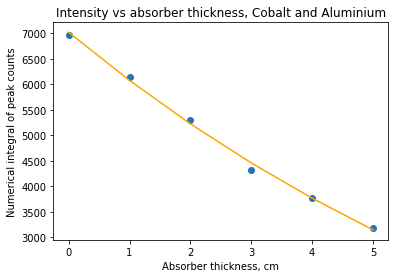

I0: 9541.421149576487
mu: 0.10433208617768207
mu std error (from covariance matrix): 0.043627585964277266
Normalised Chi-square (Chi Square / (datapoints - fitted parameters)): 2.177918910651099


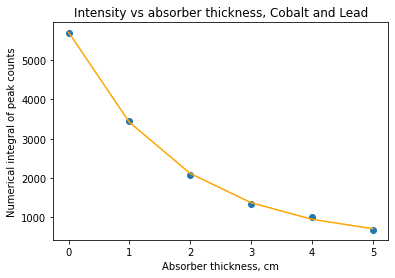

I0: 5320.53447959891
mu: 0.5637954934755157
mu std error (from covariance matrix): 0.02391394890290353
Normalised Chi-square (Chi Square / (datapoints - fitted parameters)): 2.6347194246780314


In [7]:
def exp(x,I,u,c):
    return I * np.e**(-u*x) + c

Thickness=np.array([0,1,2,3,4,5])
CsAluminiumIntensities=([IntensityCs0,IntensityCs10,IntensityCs20,IntensityCs30,IntensityCs40,IntensityCs50])
plt.scatter(Thickness,[CsAluminiumIntensities])
plt.xlabel('Absorber thickness, cm')
plt.ylabel('Numerical integral of peak counts')
plt.title('Intensity vs absorber thickness, Caesium and Aluminium')
CsParams=sp.optimize.curve_fit(exp,Thickness,CsAluminiumIntensities,p0=[37000,0.2,100])
plt.plot(Thickness,exp(Thickness,CsParams[0][0],CsParams[0][1],CsParams[0][2]),color='orange')
CsChiSq=sp.stats.chisquare(CsAluminiumIntensities,exp(Thickness,CsParams[0][0],CsParams[0][1],CsParams[0][2]))

plt.show()
print('I0:',CsParams[0][0])
print('mu:',CsParams[0][1])
print('mu std error (from covariance matrix):',CsParams[1][1][1]**0.5)
print('Normalised Chi-square (Chi Square / (datapoints - fitted parameters)):',CsChiSq[0]/3)

CsLeadIntensities=([IntensityCsL0,IntensityCsL10,IntensityCsL20,IntensityCsL30,IntensityCsL40,IntensityCsL50])
plt.scatter(Thickness,[CsLeadIntensities])
plt.xlabel('Absorber thickness, cm')
plt.ylabel('Numerical integral of peak counts')
plt.title('Intensity vs absorber thickness, Caesium and Lead')
CsLParams=sp.optimize.curve_fit(exp,Thickness,CsLeadIntensities,p0=[37000,1,400])
plt.plot(Thickness,exp(Thickness,CsLParams[0][0],CsLParams[0][1],CsLParams[0][2]),color='orange')
CsLChiSq=sp.stats.chisquare(CsLeadIntensities,exp(Thickness,CsLParams[0][0],CsLParams[0][1],CsLParams[0][2]))
plt.show()
print('I0:',CsLParams[0][0])
print('mu:',CsLParams[0][1])
print('mu std error (from covariance matrix):',CsLParams[1][1][1]**0.5)
print('Normalised Chi-square (Chi Square / (datapoints - fitted parameters)):',CsLChiSq[0]/3)


CoAluminiumIntensities=([IntensityCo0,IntensityCo10,IntensityCo20,IntensityCo30,IntensityCo40,IntensityCo50])
plt.scatter(Thickness,[CoAluminiumIntensities])
plt.xlabel('Absorber thickness, cm')
plt.ylabel('Numerical integral of peak counts')
plt.title('Intensity vs absorber thickness, Cobalt and Aluminium')
CoParams=sp.optimize.curve_fit(exp,Thickness,CoAluminiumIntensities,p0=[37000,0.2,400])
plt.plot(Thickness,exp(Thickness,CoParams[0][0],CoParams[0][1],CoParams[0][2]),color='orange')
CoChiSq=sp.stats.chisquare(CoAluminiumIntensities,exp(Thickness,CoParams[0][0],CoParams[0][1],CoParams[0][2]))
plt.show()
print('I0:',CoParams[0][0])
print('mu:',CoParams[0][1])
print('mu std error (from covariance matrix):',CoParams[1][1][1]**0.5)
print('Normalised Chi-square (Chi Square / (datapoints - fitted parameters)):',CoChiSq[0]/3)


CoLeadIntensities=([IntensityCoL0,IntensityCoL10,IntensityCoL20,IntensityCoL30,IntensityCoL40,IntensityCoL50])
plt.scatter(Thickness,[CoLeadIntensities])
plt.xlabel('Absorber thickness, cm')
plt.ylabel('Numerical integral of peak counts')
plt.title('Intensity vs absorber thickness, Cobalt and Lead')
CoLParams=sp.optimize.curve_fit(exp,Thickness,CoLeadIntensities,p0=[37000,1,400])
plt.plot(Thickness,exp(Thickness,CoLParams[0][0],CoLParams[0][1],CoLParams[0][2]),color='orange')
CoLChiSq=sp.stats.chisquare(CoLeadIntensities,exp(Thickness,CoLParams[0][0],CoLParams[0][1],CoLParams[0][2]))
plt.show()
print('I0:',CoLParams[0][0])
print('mu:',CoLParams[0][1])
print('mu std error (from covariance matrix):',CoLParams[1][1][1]**0.5)
print('Normalised Chi-square (Chi Square / (datapoints - fitted parameters)):',CoLChiSq[0]/3)


Initially, I had fit a simple exponential model of the form $I = I_{0} e^{\mu t}$ to these intensity vs thickness plots. I noticed a very large discrepancy between my results for aluminium and lead absorbers. Plotted on the exponential curve, the graph looked to be a very good fit in both cases - and indeed for the aluminium absorber returned a normalised chi squared value of ~0.9 and ~2.2 for the Caesium and Cobalt samples respectively. However, while visually the model appeared to also be a good fit for the lead graphs, it returned a chi-squared of 933 for the Caesium absorber, suggesting that the model was doing something very wrong. I realised that this was due to the fact that, by integrating over the range of the peak, I was including the small but non-zero energy of the non-compton photons and background energy. In each case, this amounted to an integral value of a few hundred, which was essentially negligible for the aluminium graphs since even with 5cm of absorber thickness, the integral of the peak was in the thousands to tens of thousands. However, this introduced a massive error for the lead graphs, where the expected count was as low as 150. To account for this, I instead used a model which accounts for a constant background: $I = I_{0} e^{\mu t} + c$. This alters the $\mu$ values by a small amount, and importantly returns normalised chi-squared values on the order of 1, instead of 1000. Obviously, a constant subtraction is not a perfect model, but I believe that it is a close enough approximation to improve the validity of the models and therefore the estimates for $\mu$.



So we finally extract our linear attenuation coefficient ($cm^{-1}$) in each of the four cases:

Caesium-137, Aluminium absorber: $\mu = 0.178 \pm 0.006$

Caesium-137, Lead absorber: $\mu = 1.18 \pm 0.003$

Cobalt-60, Aluminium absorber: $\mu = 0.10 \pm 0.04$
  
Cobalt-60, Lead absorber: $\mu = 0.56 \pm 0.02$




In [9]:
# Calculation of mu/rho and sigma with error propagation

RhoAl = 2.558
deltaAl = 0.001
RhoPb = 11.25
deltaPb = 0.01

MuRhoCsAl = 0.178/RhoAl
deltaMuRhoCsAl = MuRhoCsAl * ((deltaAl/RhoAl)**2 + (0.006/0.178)**2)**0.5

print("Mass attenuation, Caesium vs Aluminium:", MuRhoCsAl,'+/-',deltaMuRhoCsAl)

MuRhoCsPb = 1.18/RhoPb
deltaMuRhoCsPb = MuRhoCsPb * ((deltaPb/RhoPb)**2 + (0.003/1.18)**2)**0.5

print("Mass attenuation, Caesium vs Lead:", MuRhoCsPb,'+/-',deltaMuRhoCsPb)

MuRhoCoAl = 0.104/RhoAl
deltaMuRhoCoAl = MuRhoCoAl * ((deltaAl/RhoAl)**2 + (0.04/0.104)**2)**0.5

print("Mass attenuation, Cobalt vs Aluminium:", MuRhoCoAl,'+/-',deltaMuRhoCoAl)

MuRhoCoPb = 0.56/RhoPb
deltaMuRhoCoPb = MuRhoCoPb * ((deltaPb/RhoPb)**2 + (0.02/0.56)**2)**0.5

print("Mass attenuation, Cobalt vs Lead:", MuRhoCoPb,'+/-',deltaMuRhoCoPb)

Mass attenuation, Caesium vs Aluminium: 0.06958561376075059 +/- 0.0023457402265712325
Mass attenuation, Caesium vs Lead: 0.10488888888888888 +/- 0.0002824956561840218
Mass attenuation, Cobalt vs Aluminium: 0.040656763096168884 +/- 0.01563722465291223
Mass attenuation, Cobalt vs Lead: 0.04977777777777778 +/- 0.0017783283207894632


So we have our mass attenuation coefficients ($cm^2 g^{-1}$):

Caesium-137, Aluminium absorber: $\frac{\mu}{\rho} = 0.070 \pm 0.002$

Caesium-137, Lead absorber: $\frac{\mu}{\rho} = 0.1049 \pm 0.0003$

Cobalt-60, Aluminium absorber: $\frac{\mu}{\rho} = 0.041 \pm 0.016$
  
Cobalt-60, Lead absorber: $\frac{\mu}{\rho} = 0.050 \pm 0.002$

Finally, we can use $\frac{\mu}{\rho} = \sigma_{tot} \frac{N_A}{M}$ to calculate $\sigma_{tot}$ for each case.

For the purposes of error propagation, I will treat Avogadro's number and the molar masses of aluminium and lead as exact constants. 

Total cross sections ($cm^2$):

Caesium-137, Aluminium absorber: $\sigma_{tot} = 1.89 \pm 0.05$

Caesium-137, Lead absorber: $\sigma_{tot} = 21.74 \pm 0.06$

Cobalt-60, Aluminium absorber: $\sigma_{tot} = 1.1 \pm 0.4$
  
Cobalt-60, Lead absorber: $\sigma_{tot} = 10.4 \pm 0.4$

It is difficult to ascertain perfectly the validity of these values, as exact alloy composition and thickness etc will have introduced some uncertainty, however the intermediate values for $\mu$ that I calculated seem to agree to quite a good degree with some published literature. It is also worth noting that the uncertainties in the results for the Cobalt source are much higher than for those with the Caesium source - the absolute intensity of the gamma radiation from the Cobalt source seems to be much less than that of the Caesium source, with a peak count of ~300 as opposed to ~1800, and so the accuracy of the exponential fit is less, since small variations in the count numbers have a much larger effect on the data relatively speaking. In particular, the uncertainty in the values for the aluminium absorber with the cobalt source is very large, so I can't be as confident with my value for this.

## Questions

### 1. Shape of pulse height spectra

The peak energy has an approximately Gaussian shape, centred on the channel corresponding to the energy of photons produced by the source - for Caesium-137 this is at 662 keV, resulting not from the Caesium itself, but from gamma decay of one of its own decay products, Barium-137m, to its ground state. This metastable Barium may also decay by internal conversion, producing characteristic X-rays. These are responsible for the smaller, wider peak seen at the much lower energy end of the spectrum, around channels 0-100. Gamma photons that scatter off matter before reaching the scintillator will have an energy significantly lower than the peak, forming the low, but nonzero background between the X-ray and photo peaks. The peak energy has a gaussian distribution because of the nature of the measurement. Since we are counting discrete events, i.e. interactions of photons with the scintillator, and we are measuring a physical process not a perfect mathematical model, we expect to see some variance around the true peak. Since this variance is not a direct result of physical processes, but rather essentially random, it makes sense for the shape of the peak to be gaussian - most events will be counted in the exact peak channel, and then as you get further from the peak energy it gets less likely for a scintillation to occur, following the gaussian exponential model. 


### 2. Total energy peak

We are not interested in the full spectrum of the gamma radiation - we do not want to be counting energy from characteristic x-rays, or from scattered gamma photons, we are interested only in the attenuation due to interaction with the absorber material. Therefore the comparison we wish to make is between how many full-energy gamma photons are incident with the detector in each case - the thicker the absorber, the fewer photons will make it through without scattering, and hence the fewer events there will be in the total energy peak. Choosing this peak range is also helpful as it gives a consistent range for the data, so there can be no systematic error introduced by the choice of channels/energies to be counted, as it is the same for each absorber. 

### 3. Impurities in aluminium absorbers

Since the impurities are in quite small amounts (0.5% Mg and 0.5% Si), and the elements constituting these impurities are quite close to aluminium in atomic number, I would not expect there to be a significant impact on the results. From the NIST datasets for each of these elements, one can check and see that in the energy ranges we are interested in (0.5-1.5 MeV) Magnesium and Silicon are both slightly better absorbers, with linear attenuation coefficients that are between 2% and 4% greater than those for aluminium at the same energy. To make a quick and dirty linear approximation, this would introduce an increase of ~ 0.01 * 0.03 = 0.03% into the measured value of the aluminium absorber's attenuation coefficient. Given that even with the better accuracy of the Caesium sample, my estimates for attenuation coefficients had a relative uncertainty of around 2.5%, I do not believe the 0.03% of the impurities could have made a significant enough difference as to be noticeable. Perhaps with a much more sensitive scintillator, higher count range and longer sample time, so as to produce a much more accurate estimate, this effect would become measurable. 

### 4. Nature of graphs

The graphs of counting rate vs absorber thickness all display an exponential decay trend, with the lead absorbers naturally showing a far steeper gradient than the respective graphs of the aluminium absorbers. As I mentioned earlier, the 40 and 50 mm lead absorbers are so efficient that the counting rate for gamma events is almost zero, but since there is a nonzero background over the whole spectrum, even after subtracting the calibration datasets, integrating this range will produce a result that is much higher than the expected count. Hence to account for this I changed the exponential fit model I was using to include a constant term - small enough to be insignificant to the high-count peaks, such as in the aluminium graphs, but large enough to smooth out the curve to make it fit the low count datapoints. In each case I found this model to be a good fit visually, and the normalised chi-squared values I obtained tend to agree with this assessment. 

### 5. Klein-Nishina formula for Compton cross scection

